## Homework 1 
Obtain the CSV (comma separated variable) file containing the counts of bicycles crossing the Fremont Bridge since 2012 (as described in https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k). Create a project directory with subdirectories for data and analysis, and create a README file. Download the data from https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD and put it in the data directory. Create a Jupyter notebook to analyze these data. In the notebook, complete the following:

1. Read the CSV file into a pandas dataframe. (1 pt)

In [1]:
#show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#getting current path
#!pwd
#%cd /home/mbi/manipulating-data-in-python-Mengying77

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#bike = pd.read_csv('/home/mbi/manipulating-data-in-python-Mengying77/data/bike.csv', sep=',', header = 0) full path
#Read the CSV file into a pandas dataframe
bike = pd.read_csv('~/manipulating-data-in-python-Mengying77/data/bike.csv', sep=',', header = 0)
bike.head(5)
type(bike)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
0,03/31/2019 11:00:00 PM,6.0,10.0
1,03/31/2019 10:00:00 PM,7.0,14.0
2,03/31/2019 09:00:00 PM,18.0,15.0
3,03/31/2019 08:00:00 PM,26.0,31.0
4,03/31/2019 07:00:00 PM,30.0,58.0


pandas.core.frame.DataFrame

2. Add columns to the dataframe containing: ( 3 pt)


- The total (East + West) bicycle count

- The hour of the day

- The year

In [3]:
#Add a column(The total (East + West) bicycle count)
#list(bike)
total = bike['Fremont Bridge East Sidewalk']+bike['Fremont Bridge West Sidewalk']
bike['The total (East + West) bicycle count']=total
bike.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,The total (East + West) bicycle count
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0


In [4]:
#Add a column(The hour of the day)
import datetime as dt
import dateutil.parser as dparser
#bike.dtypes 
#Notes: if timestamps are str then you can convert to datetime64 using pd.to_dateime: 
# df['timestamp'] = pd.to_datetime(df['timestamp'])
date_obj = bike.loc[:, 'Date'].apply(lambda x: dt.datetime.strptime(x, '%m/%d/%Y %I:%M:%S %p'))             
bike['Hour']=date_obj.dt.hour
bike.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,The total (East + West) bicycle count,Hour
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19


In [5]:
#The year
bike['Year']=date_obj.dt.year
#or bike['Year'] = date_obj.apply(lambda x: x.year)
bike.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,The total (East + West) bicycle count,Hour,Year
0,03/31/2019 11:00:00 PM,6.0,10.0,16.0,23,2019
1,03/31/2019 10:00:00 PM,7.0,14.0,21.0,22,2019
2,03/31/2019 09:00:00 PM,18.0,15.0,33.0,21,2019
3,03/31/2019 08:00:00 PM,26.0,31.0,57.0,20,2019
4,03/31/2019 07:00:00 PM,30.0,58.0,88.0,19,2019


3. Create a dataframe with the subset of data from the year 2016 (1 pt)

In [6]:
year16 = bike[bike.Year == 2016]
year16.head(5)

,Date,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,The total (East + West) bicycle count,Hour,Year
19680,12/31/2016 11:00:00 PM,4.0,4.0,8.0,23,2016
19681,12/31/2016 10:00:00 PM,7.0,8.0,15.0,22,2016
19682,12/31/2016 09:00:00 PM,4.0,6.0,10.0,21,2016
19683,12/31/2016 08:00:00 PM,3.0,6.0,9.0,20,2016
19684,12/31/2016 07:00:00 PM,6.0,4.0,10.0,19,2016


4. Use pandas + matplotlib to plot the counts by hour. (i.e. hour of the day on the x-axis, total daily counts on the y-axis) (1 pt)

Hour
0       3910.0
1       2025.0
2       1265.0
3        781.0
4       2240.0
5      10154.0
6      34882.0
7      89624.0
8     121438.0
9      68366.0
10     34856.0
11     29759.0
12     31614.0
13     33322.0
14     36411.0
15     48102.0
16     82838.0
17    146046.0
18     96156.0
19     46528.0
20     27026.0
21     17001.0
22     11145.0
23      6981.0
Name: The total (East + West) bicycle count, dtype: float64

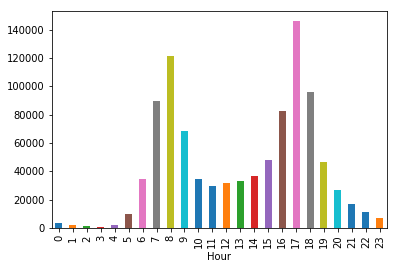

In [7]:
#using the 2016 subset derived from Q3.
df = year16.loc[:, ['The total (East + West) bicycle count','Hour']]
count = df.groupby(['Hour'])['The total (East + West) bicycle count'].sum()
count
bar = count.plot(kind='bar', x='Hour', y='total daily counts')
plt.show()

5. Use pandas to determine what is (on average) the busiest hour of the day (1 pt)

Note that we fully expect this analysis to cover some unfamiliar ground, and require teaching yourself a bit about Python and/or the Pandas package. Part of the intent of this assignment is to give you practice seeking help via the web, which (in our experience) is an essential part of using any data science tool. For example, if you type a question about Pandas into Google, you’ll often find an existing answer to your question or something similar on the website StackOverflow.

A couple other online resources that might be helpful as you work through this: The Python Data Science Handbook (free online) has a chapter devoted to Pandas Jake’s Jupyter Workflow Video Series shows some examples of working with this particular dataset in a Jupyter notebook. Hints The “date” field is a string coded as “yyyy-mm-dd-Thh” where “yyyy” is the year, “mm” is the month, “dd” is the day, and “hh” is the hour. (You’ll need to write python code to decode the strings.)

In [8]:
average = df.groupby(['Hour'])['The total (East + West) bicycle count'].mean()
#type(average)
average[average == max(average)]
#average

Hour
17    399.032787
Name: The total (East + West) bicycle count, dtype: float64

5PM is the busiest hour of the day.